# Phase 1.1: Data Exploration and Analysis

## Objectives:
- Load and inspect the Cars Dataset and Accessories Dataset
- Understand data structure and quality
- Identify missing values and data issues
- Perform exploratory data analysis (EDA)
- Document insights for next steps

---

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load Datasets

In [16]:
# TESTING: Direct file check
import pandas as pd
test_df = pd.read_excel('../../Dataset/Accessory Dataset.xlsx', sheet_name=0)
print(f"Direct load test: {len(test_df)} rows")
print(f"Columns: {list(test_df.columns)}")
if len(test_df) > 0:
    print("\nFirst row:")
    print(test_df.iloc[0])

Direct load test: 1954 rows
Columns: ['Car Brand', 'Car Model', 'Accessory Name', 'Accessory Price', 'Accessory Description', 'Compatible Cars', 'Top 5 Reviews']

First row:
Car Brand                                                           Toyota
Car Model                                               Land Cruiser Prado
Accessory Name           100% Water Resistant Car Body Cover with Mirro...
Accessory Price                                                    ?375.20
Accessory Description    Heavy-duty car cover with triple stitching, mi...
Compatible Cars                                  Toyota Land Cruiser Prado
Top 5 Reviews            Superb Quality Product: strong protection, wat...
Name: 0, dtype: object


In [17]:
# Define paths
data_dir = Path('../../Dataset')
cars_file = data_dir / 'Cars Dataset.csv'
accessories_file = data_dir / 'Accessory Dataset.xlsx'

print(f"Looking for files in: {data_dir.absolute()}")
print(f"Cars file exists: {cars_file.exists()}")
print(f"Accessories file exists: {accessories_file.exists()}")

# Load Cars Dataset
print("\n📁 Loading Cars Dataset...")
df_cars = pd.read_csv(cars_file)
print(f"✅ Loaded {len(df_cars)} cars")

# Load Accessories Dataset
print("\n📁 Loading Accessories Dataset...")
df_accessories = pd.read_excel(accessories_file, sheet_name='Sheet1')
print(f"✅ Loaded {len(df_accessories)} accessories")

# Show basic info
print(f"\n📊 Quick Summary:")
print(f"   Cars: {len(df_cars)} rows × {len(df_cars.columns)} columns")
print(f"   Accessories: {len(df_accessories)} rows × {len(df_accessories.columns)} columns")

Looking for files in: C:\Users\mhasa\OneDrive\Desktop\AI Project\ML_Engine\notebooks\..\..\Dataset
Cars file exists: True
Accessories file exists: True

📁 Loading Cars Dataset...
✅ Loaded 242 cars

📁 Loading Accessories Dataset...
✅ Loaded 1954 accessories

📊 Quick Summary:
   Cars: 242 rows × 9 columns
   Accessories: 1954 rows × 7 columns


In [18]:
# Quick verification that data loaded correctly
print("\n" + "="*80)
print("QUICK DATA VERIFICATION")
print("="*80)

if len(df_cars) == 0:
    print("❌ WARNING: Cars dataset is empty!")
else:
    print(f"✅ Cars dataset: {len(df_cars)} rows, {len(df_cars.columns)} columns")

if len(df_accessories) == 0:
    print("❌ WARNING: Accessories dataset is empty!")
else:
    print(f"✅ Accessories dataset: {len(df_accessories)} rows, {len(df_accessories.columns)} columns")
    
print("\n👍 Data loaded successfully! Proceeding with analysis...")


QUICK DATA VERIFICATION
✅ Cars dataset: 242 rows, 9 columns
✅ Accessories dataset: 1954 rows, 7 columns

👍 Data loaded successfully! Proceeding with analysis...


## 2. Cars Dataset - Initial Inspection

In [19]:
print("=" * 80)
print("CARS DATASET - BASIC INFORMATION")
print("=" * 80)

print(f"\n📊 Shape: {df_cars.shape[0]} rows × {df_cars.shape[1]} columns")
print(f"\n📋 Columns: {list(df_cars.columns)}")

print("\n🔍 Data Types:")
print(df_cars.dtypes)

print("\n❓ Missing Values:")
missing = df_cars.isnull().sum()
missing_pct = (missing / len(df_cars) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print("✅ No missing values found!")

CARS DATASET - BASIC INFORMATION

📊 Shape: 242 rows × 9 columns

📋 Columns: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Year', 'Engine_Size_L', 'Seats', 'Body_Type', 'Price_Range_Lakh']

🔍 Data Types:
Brand                object
Model                object
Fuel_Type            object
Transmission         object
Year                  int64
Engine_Size_L       float64
Seats                 int64
Body_Type            object
Price_Range_Lakh     object
dtype: object

❓ Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
✅ No missing values found!


In [20]:
# Display first few rows
print("\n📄 First 10 rows of Cars Dataset:")
df_cars.head(10)


📄 First 10 rows of Cars Dataset:


,Brand,Model,Fuel_Type,Transmission,Year,Engine_Size_L,Seats,Body_Type,Price_Range_Lakh
0,Aston Martin,Vantage,Petrol,AT,2025,4.0,2,Coupe,399.00-450.00
1,Aston Martin,DB11,Petrol,AT,2025,4.0,4,Coupe,500.00-580.00
2,Aston Martin,DBX,Petrol,AT,2025,4.0,5,SUV,550.00-650.00
3,Audi,Q8 e-tron,Electric,Automatic,2025,0.0,5,Electric SUV,115.00-127.00
4,Audi,Q8,Petrol,AT,2025,3.0,5,Premium SUV,117.00-125.00
5,Audi,RS 5,Petrol,AT,2025,2.9,4,Coupe,150.00-170.00
6,Audi,A8,Petrol,AT,2025,3.0,5,Sedan,156.00-175.00
7,Audi,e-tron GT,Electric,Automatic,2025,0.0,4,Electric Coupe,172.00-205.00
8,Audi,RS Q8,Petrol,AT,2025,4.0,5,Performance SUV,220.00-250.00
9,Audi,A3,Petrol,DCT,2025,1.4,5,Sedan,38.00-42.00


In [21]:
# Statistical summary
print("\n📈 Statistical Summary:")
df_cars.describe(include='all').T


📈 Statistical Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,242,34,Maruti Suzuki,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,242,242,Vantage,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,242,8,Petrol,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,242,16,AT,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,242.0,NaN,NaN,NaN,2025.0,0.0,2025.0,2025.0,2025.0,2025.0,2025.0
Engine_Size_L,242.0,NaN,NaN,NaN,1.989256,1.529275,0.0,1.2,2.0,2.975,6.75
Seats,242.0,NaN,NaN,NaN,5.132231,1.657084,2.0,5.0,5.0,5.0,17.0
Body_Type,242,24,Sedan,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price_Range_Lakh,242,231,85.00-95.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Cars Dataset - Unique Values Analysis

In [22]:
print("=" * 80)
print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("=" * 80)

# Brands
print(f"\n🚗 Unique Brands: {df_cars['Brand'].nunique()}")
print(df_cars['Brand'].value_counts().head(10))

# Body Types
print(f"\n🚙 Unique Body Types: {df_cars['Body_Type'].nunique()}")
print(df_cars['Body_Type'].value_counts())

# Fuel Types
print(f"\n⛽ Unique Fuel Types: {df_cars['Fuel_Type'].nunique()}")
print(df_cars['Fuel_Type'].value_counts())

# Transmission
print(f"\n⚙️ Unique Transmissions: {df_cars['Transmission'].nunique()}")
print(df_cars['Transmission'].value_counts())

# Years
print(f"\n📅 Year Range: {df_cars['Year'].min()} - {df_cars['Year'].max()}")
print(df_cars['Year'].value_counts().sort_index())

UNIQUE VALUES IN CATEGORICAL COLUMNS

🚗 Unique Brands: 34
Brand
Maruti Suzuki    22
BMW              21
Mercedes-Benz    21
Tata             18
Audi             14
Hyundai          13
Toyota           12
Mahindra         11
Porsche           9
Volvo             6
Name: count, dtype: int64

🚙 Unique Body Types: 24
Body_Type
Sedan                 42
Mid-size SUV          29
Coupe                 27
Electric SUV          23
Premium SUV           22
Compact SUV           20
Hatchback             20
MUV                   13
Electric Sedan         8
SUV                    7
Convertible            6
Coupe SUV              4
Electric Hatchback     4
Electric Coupe         3
Premium MUV            3
Electric MUV           2
Micro SUV              2
Performance SUV        1
Passenger Van          1
Commercial             1
Ultra Luxury Sedan     1
Ultra Luxury SUV       1
Pickup Truck           1
Wagon                  1
Name: count, dtype: int64

⛽ Unique Fuel Types: 8
Fuel_Type
Petrol         

## 4. Cars Dataset - Visualizations

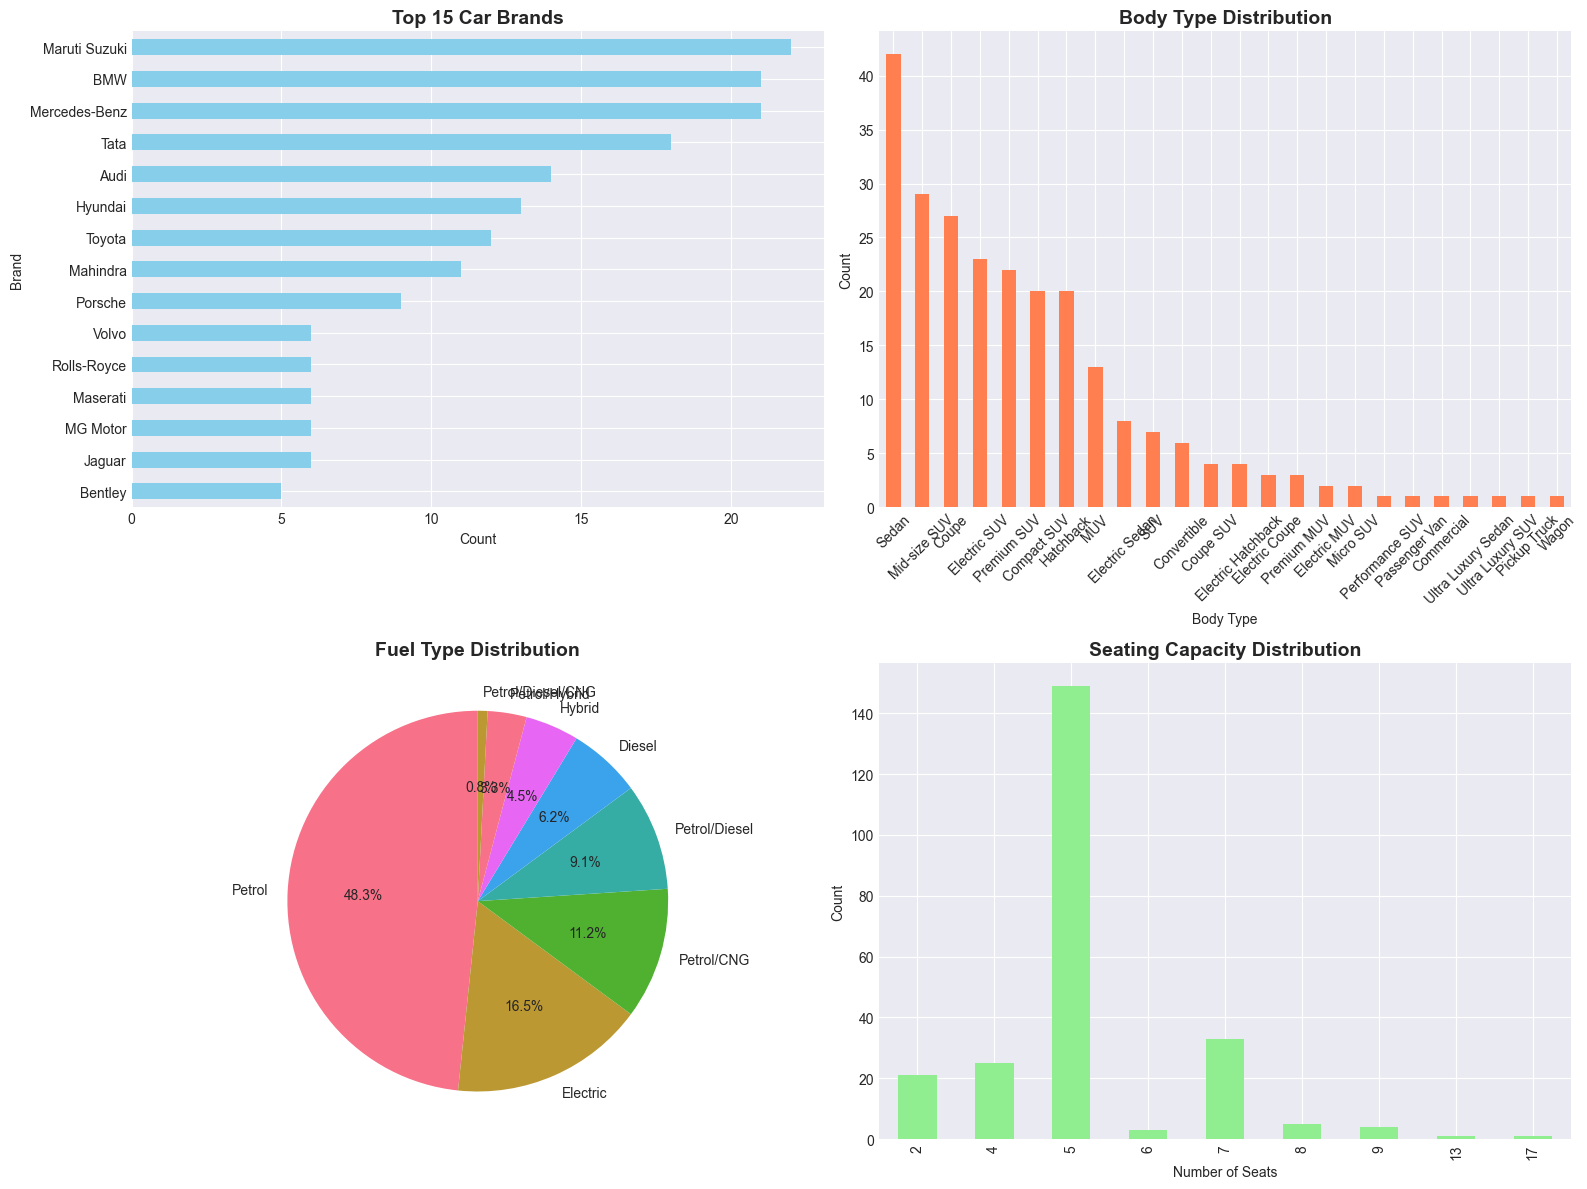

In [23]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 Brands
df_cars['Brand'].value_counts().head(15).plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 15 Car Brands', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Count')
axes[0, 0].invert_yaxis()

# 2. Body Types Distribution
df_cars['Body_Type'].value_counts().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Body Type Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Body Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Fuel Type Distribution
df_cars['Fuel_Type'].value_counts().plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Fuel Type Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('')

# 4. Seats Distribution
df_cars['Seats'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Seating Capacity Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Seats')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
# Price Analysis
# Extract min and max prices from Price_Range_Lakh column
def extract_price_info(price_range_str):
    """Extract min and max price from price range string"""
    if pd.isna(price_range_str):
        return None, None
    
    try:
        # Remove any commas and split by '-'
        price_range_str = str(price_range_str).replace(',', '')
        if '-' in price_range_str:
            prices = price_range_str.split('-')
            min_price = float(prices[0])
            max_price = float(prices[1])
        else:
            min_price = max_price = float(price_range_str)
        return min_price, max_price
    except:
        return None, None

# Apply the function
df_cars[['Price_Min_Lakh', 'Price_Max_Lakh']] = df_cars['Price_Range_Lakh'].apply(
    lambda x: pd.Series(extract_price_info(x))
)

# Calculate average price
df_cars['Price_Avg_Lakh'] = (df_cars['Price_Min_Lakh'] + df_cars['Price_Max_Lakh']) / 2

print("\n💰 Price Statistics (in Lakhs):")
print(df_cars[['Price_Min_Lakh', 'Price_Max_Lakh', 'Price_Avg_Lakh']].describe())


💰 Price Statistics (in Lakhs):
       Price_Min_Lakh  Price_Max_Lakh  Price_Avg_Lakh
count      242.000000      242.000000      242.000000
mean       128.003347      148.816901      138.410124
std        214.844515      236.240364      224.944064
min          4.230000        5.870000        5.190000
25%         11.515000       17.585000       14.526250
50%         50.000000       56.505000       52.970000
75%        139.875000      159.125000      149.125000
max       2000.000000     2000.000000     2000.000000


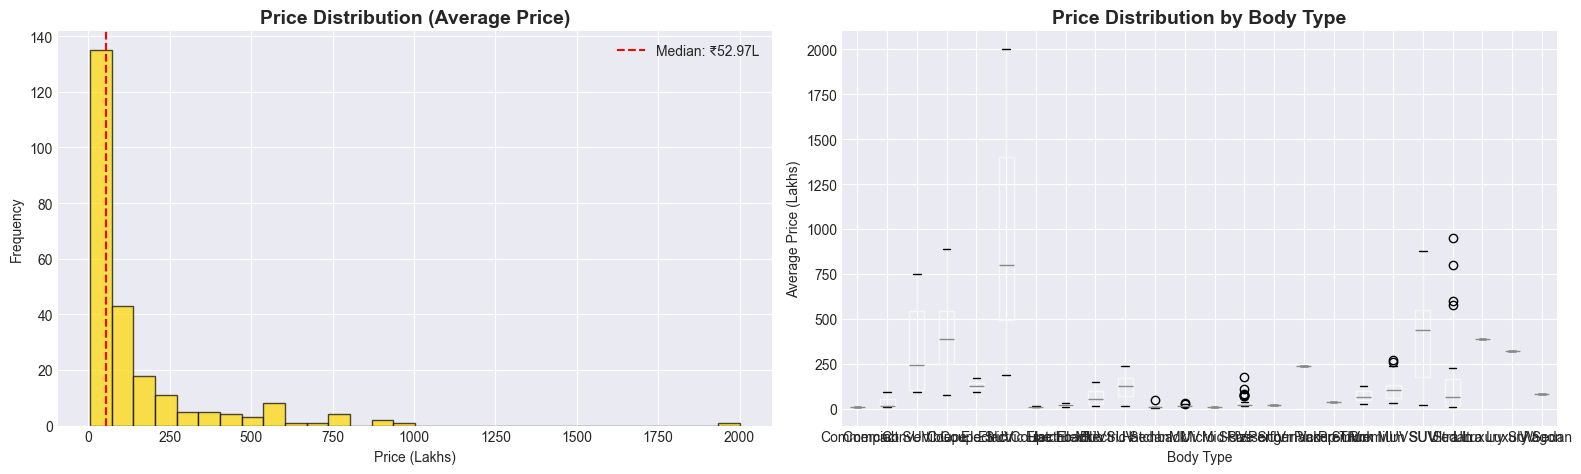

In [25]:
# Price Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Price distribution histogram
axes[0].hist(df_cars['Price_Avg_Lakh'].dropna(), bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution (Average Price)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (Lakhs)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_cars['Price_Avg_Lakh'].median(), color='red', linestyle='--', label=f'Median: ₹{df_cars["Price_Avg_Lakh"].median():.2f}L')
axes[0].legend()

# Box plot by body type
df_cars.boxplot(column='Price_Avg_Lakh', by='Body_Type', ax=axes[1])
axes[1].set_title('Price Distribution by Body Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Body Type')
axes[1].set_ylabel('Average Price (Lakhs)')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

## 5. Accessories Dataset - Initial Inspection

In [26]:
print("=" * 80)
print("ACCESSORIES DATASET - BASIC INFORMATION")
print("=" * 80)

print(f"\n📊 Shape: {df_accessories.shape[0]} rows × {df_accessories.shape[1]} columns")
print(f"\n📋 Columns: {list(df_accessories.columns)}")

print("\n🔍 Data Types:")
print(df_accessories.dtypes)

print("\n❓ Missing Values:")
missing_acc = df_accessories.isnull().sum()
missing_pct_acc = (missing_acc / len(df_accessories) * 100).round(2)
missing_df_acc = pd.DataFrame({
    'Missing Count': missing_acc,
    'Percentage': missing_pct_acc
})
print(missing_df_acc[missing_df_acc['Missing Count'] > 0])

if missing_acc.sum() == 0:
    print("✅ No missing values found!")

ACCESSORIES DATASET - BASIC INFORMATION

📊 Shape: 1954 rows × 7 columns

📋 Columns: ['Car Brand', 'Car Model', 'Accessory Name', 'Accessory Price', 'Accessory Description', 'Compatible Cars', 'Top 5 Reviews']

🔍 Data Types:
Car Brand                object
Car Model                object
Accessory Name           object
Accessory Price          object
Accessory Description    object
Compatible Cars          object
Top 5 Reviews            object
dtype: object

❓ Missing Values:
                       Missing Count  Percentage
Accessory Price                    6        0.31
Accessory Description              7        0.36
Compatible Cars                    5        0.26
Top 5 Reviews                    125        6.40


In [27]:
# Display first few rows
print("\n📄 First 10 rows of Accessories Dataset:")
df_accessories.head(10)


📄 First 10 rows of Accessories Dataset:


,Car Brand,Car Model,Accessory Name,Accessory Price,Accessory Description,Compatible Cars,Top 5 Reviews
0,Toyota,Land Cruiser Prado,100% Water Resistant Car Body Cover with Mirro...,?375.20,"Heavy-duty car cover with triple stitching, mi...",Toyota Land Cruiser Prado,"Superb Quality Product: strong protection, wat..."
1,Citroen,eC3,10D Car Floor Mat Full Set,5999,"Custom Fitted Faux Leather Antiskid, 100% Wate...",Citroen eC3,High Quality & Great Value for Money!|hard kam...
2,Mahindra,XEV 9e,10D Car Foot Mat,"₹6,999.00","Premium Leather, Luxurious, Waterproof, Custom...",Mahindra XEV 9E 2025 Onwards,Aditya Thakur: These mats are definitely value...
3,Audi,RS 5,10D Car Foot Mat (Tan with Black),6999,"10D Premium leather, luxurious, waterproof, an...",Audi RS 5 and others,"['value for money, offering style/durability',..."
4,Jaguar,XJL (2015-2025),10D Premium Imported Car Floor Mat,"₹6,099.00","Luxury Leather, 10D Premium, Waterproof, Dustp...",Jaguar XJL (2015-2025),"Innova HYCROSS|Good product|Great quality, per..."
5,Hyundai,Exter,10H2 Car Headlight Anti-Rain Guard,329,"Self adhesive tempered glass, waterproof anti-...",Hyundai Exter,Good product
6,Lexus,RX 350H (2024 Onwards),11D Custom Fitted Car Floor Mat,9999,"11-layer premium leatherette, waterproof, anti...",Lexus RX 350H (2024 Onwards),"['Great fit and quality for VW Tiguan.', 'Fine..."
7,AutoZing,iX (2024),11D Custom Fitted Car Floor Mat - Black,"₹9,449","11-layer premium mat for BMW iX, custom fitted...",BMW iX (2024),"['Pratik: 5.0 - Good fit for VW Tiguan 2023.',..."
8,Audi,RS 5,11D Custom Fitted Car Floor Mat (Black Black),9999,"11D luxury mats with detachable curly mat, mul...",Audi RS 5 (vehicle specific),['Extremely good fit and quality for VW TIGUAN...
9,MM,Universal,1pc Center Console Armrest Pad 2 Pieces Seat B...,599,3-in-1 seat belt pad and armrest pad; soft PU ...,"Audi RS Q8, Universal","3 reviews: Balaji Dandnaik - 3.0 stars: ""Produ..."


In [28]:
# Display all column names clearly
print("\n📋 All Columns in Accessories Dataset:")
for i, col in enumerate(df_accessories.columns, 1):
    print(f"{i}. {col}")


📋 All Columns in Accessories Dataset:
1. Car Brand
2. Car Model
3. Accessory Name
4. Accessory Price
5. Accessory Description
6. Compatible Cars
7. Top 5 Reviews


In [29]:
# Check if there's a reviews column or similar
print("\n🔍 Searching for review-related columns...")
review_cols = [col for col in df_accessories.columns if 'review' in col.lower() or 'rating' in col.lower() or 'comment' in col.lower()]
if review_cols:
    print(f"✅ Found review columns: {review_cols}")
else:
    print("⚠️ No obvious review columns found. Will need to check column contents.")


🔍 Searching for review-related columns...
✅ Found review columns: ['Top 5 Reviews']


In [30]:
# Statistical summary
print("\n📈 Statistical Summary of Accessories:")
df_accessories.describe(include='all').T


📈 Statistical Summary of Accessories:


,count,unique,top,freq
Car Brand,1954,68,BMW,226
Car Model,1954,333,Q8,28
Accessory Name,1954,1602,CAPDELL 7D Premium Car Floor Mat,18
Accessory Price,1948,1027,499,43
Accessory Description,1947,1875,Customised fit designed specifically for BMW X...,15
Compatible Cars,1949,1080,Universal,54
Top 5 Reviews,1829,1598,No reviews available,21


## 6. Accessories Dataset - Category Analysis

In [31]:
# Analyze categorical columns in accessories dataset
print("=" * 80)
print("ACCESSORIES DATASET - CATEGORICAL ANALYSIS")
print("=" * 80)

# Find categorical columns
categorical_cols = df_accessories.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Found {len(categorical_cols)} categorical columns")

# Display unique values for each categorical column (limit to first few)
for col in categorical_cols[:10]:  # Show first 10 categorical columns
    unique_count = df_accessories[col].nunique()
    print(f"\n🔹 {col}: {unique_count} unique values")
    if unique_count <= 20:  # Show value counts if reasonable number
        print(df_accessories[col].value_counts().head(10))

ACCESSORIES DATASET - CATEGORICAL ANALYSIS

📊 Found 7 categorical columns

🔹 Car Brand: 68 unique values

🔹 Car Model: 333 unique values

🔹 Accessory Name: 1602 unique values

🔹 Accessory Price: 1027 unique values

🔹 Accessory Description: 1875 unique values

🔹 Compatible Cars: 1080 unique values

🔹 Top 5 Reviews: 1598 unique values


## 7. Data Quality Assessment

In [32]:
print("=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check for duplicates in Cars dataset
cars_duplicates = df_cars.duplicated().sum()
print(f"\n🚗 Cars Dataset - Duplicate rows: {cars_duplicates}")

# Check for duplicates in Accessories dataset
acc_duplicates = df_accessories.duplicated().sum()
print(f"🔧 Accessories Dataset - Duplicate rows: {acc_duplicates}")

# Data completeness
cars_completeness = (1 - df_cars.isnull().sum().sum() / (df_cars.shape[0] * df_cars.shape[1])) * 100
acc_completeness = (1 - df_accessories.isnull().sum().sum() / (df_accessories.shape[0] * df_accessories.shape[1])) * 100

print(f"\n📊 Cars Dataset - Data Completeness: {cars_completeness:.2f}%")
print(f"📊 Accessories Dataset - Data Completeness: {acc_completeness:.2f}%")

DATA QUALITY ASSESSMENT

🚗 Cars Dataset - Duplicate rows: 0
🔧 Accessories Dataset - Duplicate rows: 22

📊 Cars Dataset - Data Completeness: 100.00%
📊 Accessories Dataset - Data Completeness: 98.95%


## 8. Key Insights and Findings

In [33]:
print("=" * 80)
print("KEY INSIGHTS AND FINDINGS")
print("=" * 80)

insights = [
    f"📈 Total Cars: {len(df_cars)}",
    f"🔧 Total Accessories: {len(df_accessories)}",
    f"🚗 Unique Car Brands: {df_cars['Brand'].nunique()}",
    f"🚙 Body Types: {df_cars['Body_Type'].nunique()} different types",
    f"⛽ Fuel Types: {df_cars['Fuel_Type'].nunique()} different types",
    f"💰 Price Range: ₹{df_cars['Price_Min_Lakh'].min():.2f}L - ₹{df_cars['Price_Max_Lakh'].max():.2f}L",
    f"📅 Year Range: {df_cars['Year'].min()} - {df_cars['Year'].max()}",
]

for insight in insights:
    print(f"\n  {insight}")

print("\n" + "=" * 80)

KEY INSIGHTS AND FINDINGS

  📈 Total Cars: 242

  🔧 Total Accessories: 1954

  🚗 Unique Car Brands: 34

  🚙 Body Types: 24 different types

  ⛽ Fuel Types: 8 different types

  💰 Price Range: ₹4.23L - ₹2000.00L

  📅 Year Range: 2025 - 2025



## 9. Save Temporary Analysis Results

In [34]:
# Save the enhanced cars dataset with price columns
output_path = Path('../../Dataset/processed')
output_path.mkdir(exist_ok=True)

df_cars.to_csv(output_path / 'cars_with_price_features.csv', index=False)
print(f"\n✅ Saved enhanced cars dataset to: {output_path / 'cars_with_price_features.csv'}")

print("\n" + "=" * 80)
print("EXPLORATION COMPLETE!")
print("=" * 80)
print("\n📝 Next Steps:")
print("  1. Run data cleaning notebook (02_data_cleaning.ipynb)")
print("  2. Engineer features for recommendation system")
print("  3. Prepare reviews for sentiment analysis")


✅ Saved enhanced cars dataset to: ..\..\Dataset\processed\cars_with_price_features.csv

EXPLORATION COMPLETE!

📝 Next Steps:
  1. Run data cleaning notebook (02_data_cleaning.ipynb)
  2. Engineer features for recommendation system
  3. Prepare reviews for sentiment analysis
